# Exploring the Titanic dataset

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
sns.set_theme()

# Loading Dataset

Using the titanic dataset available in the seaborn library

In [4]:
raw_df = sns.load_dataset('titanic')

In [5]:
raw_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
raw_df.shape

(891, 15)

# Data Pre-Processsing for EDA

## Duplicates

In [7]:
raw_df.duplicated().any()

np.True_

In [8]:
df_no_dp = raw_df.drop_duplicates().copy()
df_no_dp.shape

(784, 15)

## Handling Missing Values

In [9]:
df_no_dp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    object  
 3   age          678 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     782 non-null    object  
 8   class        784 non-null    category
 9   who          784 non-null    object  
 10  adult_male   784 non-null    bool    
 11  deck         202 non-null    category
 12  embark_town  782 non-null    object  
 13  alive        784 non-null    object  
 14  alone        784 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 77.0+ KB


In [10]:
nulls = df_no_dp.isna().sum().sort_values(ascending=False).to_frame(name="NAN Counts")
nulls

,NAN Counts
deck,582
age,106
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


Ignoring missing values for now

## Feature Encoding & Derived Matrices

In [11]:
df_enc = df_no_dp.copy(deep=True)

converting `sex` to numerical called `is_male`

In [12]:
sex_num_col = df_enc['sex'].map({'male': 1, 'female': 0})
df_enc.insert(3, "is_male", sex_num_col)
df_enc[['is_male']].head()

,is_male
0,1
1,0
2,0
3,0
4,1


Creating `Family_size` column

In [13]:
df_enc.head()

,survived,pclass,sex,is_male,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
fam = df_enc['sibsp'] + df_enc['parch']
df_enc['Family_size'] = fam
df_enc[['Family_size']].head()

,Family_size
0,1
1,1
2,0
3,1
4,0


## Feature Selection & Cleaning

In [15]:
df_clean = df_enc

In [16]:
df_clean.head()

,survived,pclass,sex,is_male,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Family_size
0,0,3,male,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [17]:
alive_column = df_clean.pop('alive')
df_clean.insert(0, alive_column.name, alive_column)
df_clean.drop(columns=["embarked"], inplace=True)
df_clean.head()

,alive,survived,pclass,sex,is_male,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone,Family_size
0,no,0,3,male,1,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,False,1
1,yes,1,1,female,0,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,False,1
2,yes,1,3,female,0,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,True,0
3,yes,1,1,female,0,35.0,1,0,53.1000,First,woman,False,C,Southampton,False,1
4,no,0,3,male,1,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,True,0


# EDA

In [18]:
df = df_clean.copy(deep=True)

Central Tendencies

In [19]:
df.describe().round(2)

,survived,pclass,is_male,age,sibsp,parch,fare,Family_size
count,784.00,784.00,784.00,678.00,784.00,784.00,784.00,784.00
mean,0.41,2.24,0.63,29.87,0.52,0.42,34.71,0.94
std,0.49,0.86,0.48,14.76,0.99,0.84,52.16,1.52
min,0.00,1.00,0.00,0.42,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,20.00,0.00,0.00,8.05,0.00
50%,0.00,3.00,1.00,28.25,0.00,0.00,15.90,0.00
75%,1.00,3.00,1.00,39.00,1.00,1.00,34.11,1.00
max,1.00,3.00,1.00,80.00,8.00,6.00,512.33,10.00


In [20]:
mean_age = df["age"].mean().__round__(2)
mean_age

np.float64(29.87)

## Feature Distributions

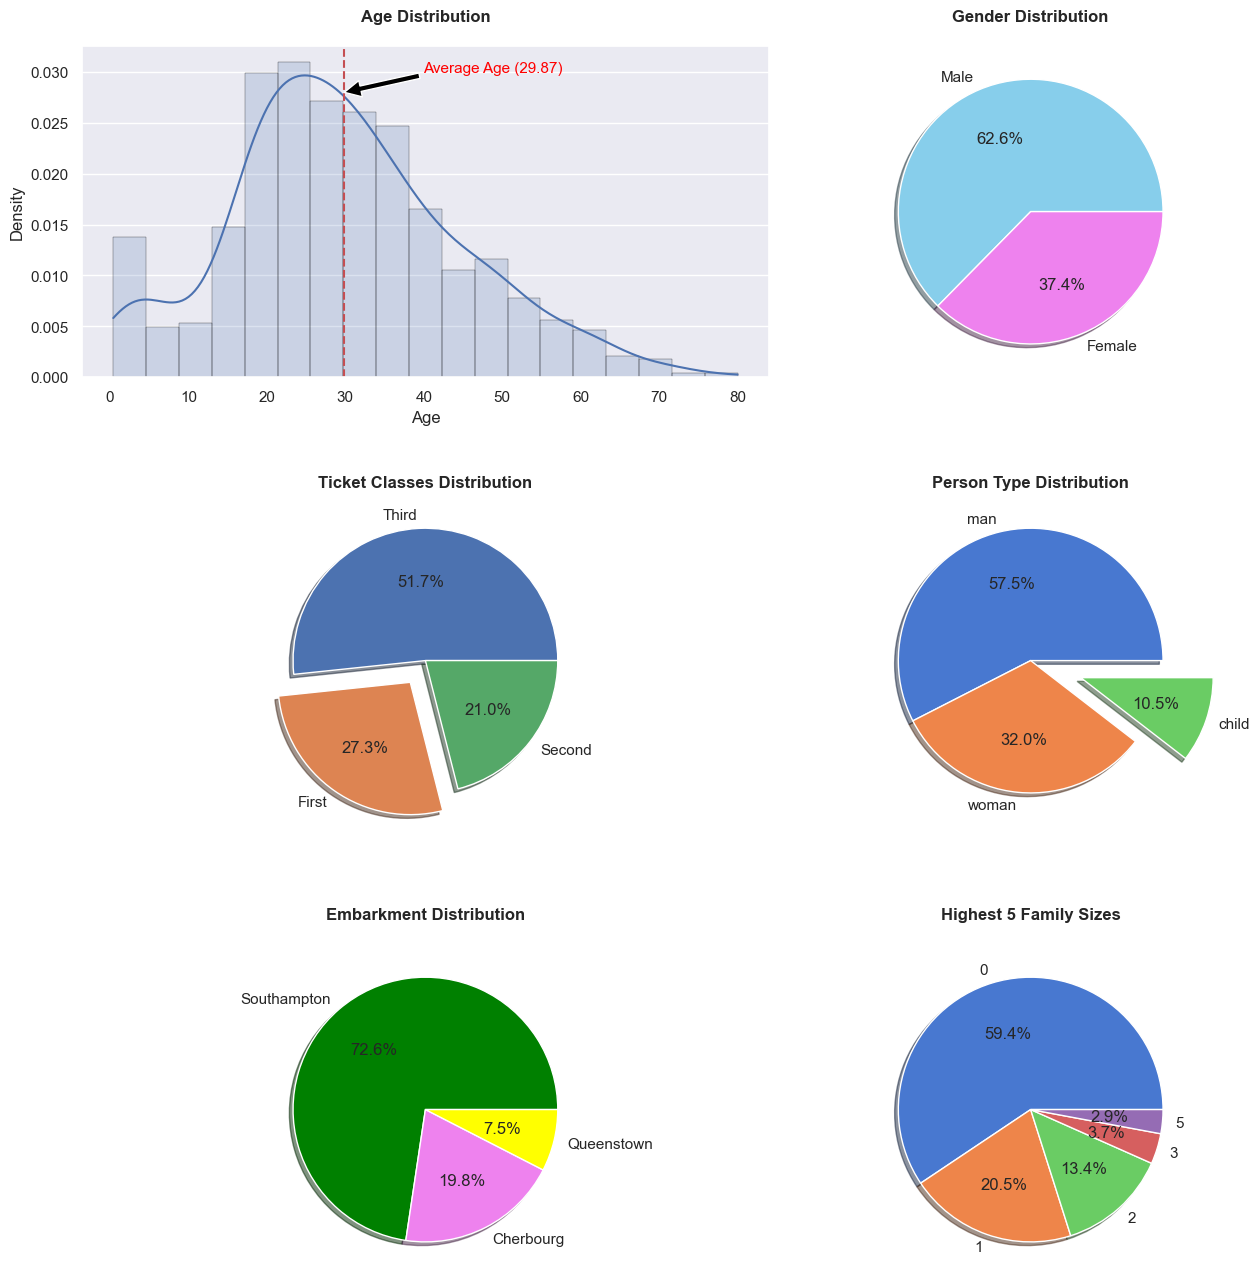

In [21]:
plt.figure(figsize=(14, 13))

# Seaborn histogram for age
plt.subplot(3, 2, 1)
sns.histplot(df['age'], kde=True, alpha=0.2, linewidth=0.2, stat="density", edgecolor='black')

plt.axvline(x=mean_age, color='r', linestyle='--', label='Mean')    # Vertical Line for the average
plt.annotate(
    f"Average Age ({mean_age})",
    xy=(mean_age, 0.028),
    xytext=(mean_age + 10, 0.03),
    arrowprops=dict(facecolor='black'),
    fontsize=11,
    color='red'
)
plt.title("Age Distribution", weight='bold', y=1.05)
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(axis='x')


# Gender Pie plot
plt.subplot(3, 2, 2)
plt.pie(
    df["sex"].value_counts(),
    labels=["Male", "Female"],
    autopct=lambda x: f"{x:.1f}%",
    shadow=True,
    colors=["skyblue", "violet"],
)
plt.title("Gender Distribution", weight="bold", y=1.05)


# Ticket class Pie plot
plt.subplot(3, 2, 3)
plt.pie(
    df["class"].value_counts(),
    labels=df["class"].value_counts().index,
    autopct=lambda x: f"{x:.1f}%",
    shadow=True,
    explode=[0, 0.2, 0]
)
plt.title("Ticket Classes Distribution", weight="bold")


# Person Type Pie plot
plt.subplot(3, 2, 4)
plt.pie(
    df["who"].value_counts(),
    labels=df["who"].value_counts().index,
    autopct=lambda x: f"{x:.1f}%",
    shadow=True,
    explode=[0, 0, 0.4],
    colors=sns.color_palette("muted")
)
plt.title("Person Type Distribution", weight="bold")


plt.subplot(3, 2, 5)
plt.pie(
    df['embark_town'].value_counts(),
    labels=df['embark_town'].value_counts().index,
    autopct=lambda x: f"{x:.1f}%",
    shadow=True,
    colors=["green", "violet", "yellow"],
)
plt.title("Embarkment Distribution", weight="bold", y=1.05)


plt.subplot(3, 2, 6)
plt.pie(
    df['Family_size'].value_counts()[:5],
    labels=df['Family_size'].value_counts()[:5].index,
    autopct=lambda x: f"{x:.1f}%",
    shadow=True,
    colors=sns.color_palette("muted"),
)
plt.title("Highest 5 Family Sizes", weight="bold", y=1.05)

# Adjust layout
plt.tight_layout(h_pad=3)
plt.show()

Box Plots

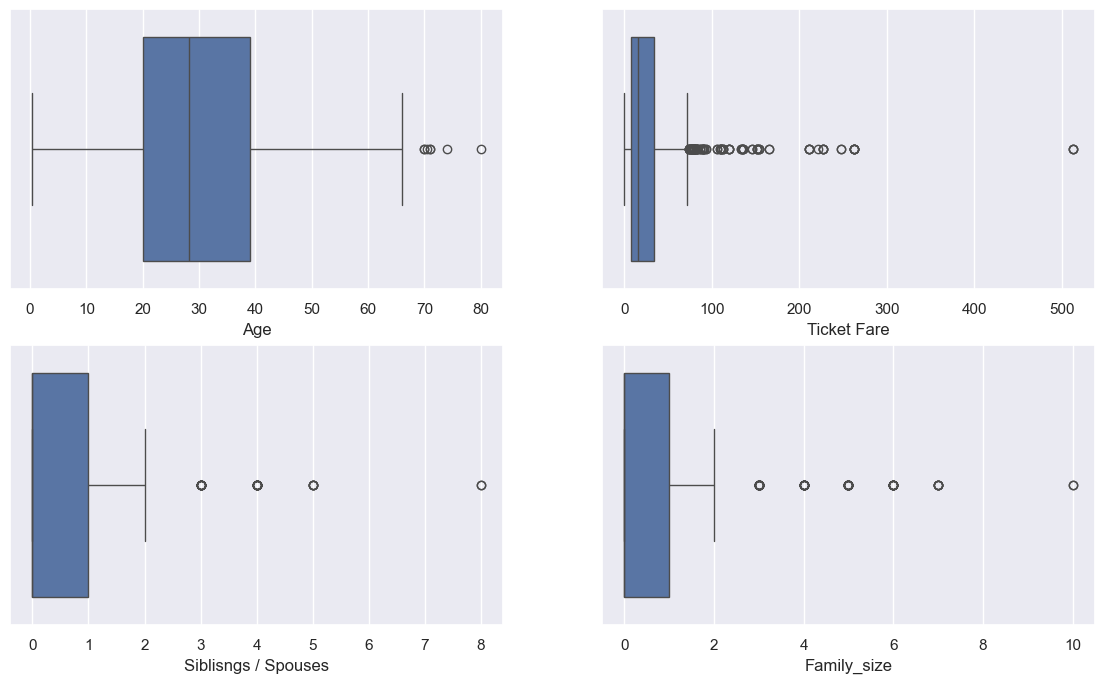

In [22]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['age'])
plt.xlabel("Age")

plt.subplot(2, 2, 2)
sns.boxplot(x=df['fare'])
plt.xlabel("Ticket Fare")

plt.subplot(2, 2, 3)
sns.boxplot(x=df['sibsp'])
plt.xlabel("Siblisngs / Spouses")

plt.subplot(2, 2, 4)
sns.boxplot(x=df['Family_size'])

plt.show()

## Correlations

### Pair Plots

In [23]:
df.head()

,alive,survived,pclass,sex,is_male,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone,Family_size
0,no,0,3,male,1,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,False,1
1,yes,1,1,female,0,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,False,1
2,yes,1,3,female,0,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,True,0
3,yes,1,1,female,0,35.0,1,0,53.1000,First,woman,False,C,Southampton,False,1
4,no,0,3,male,1,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,True,0


<Figure size 1200x800 with 0 Axes>

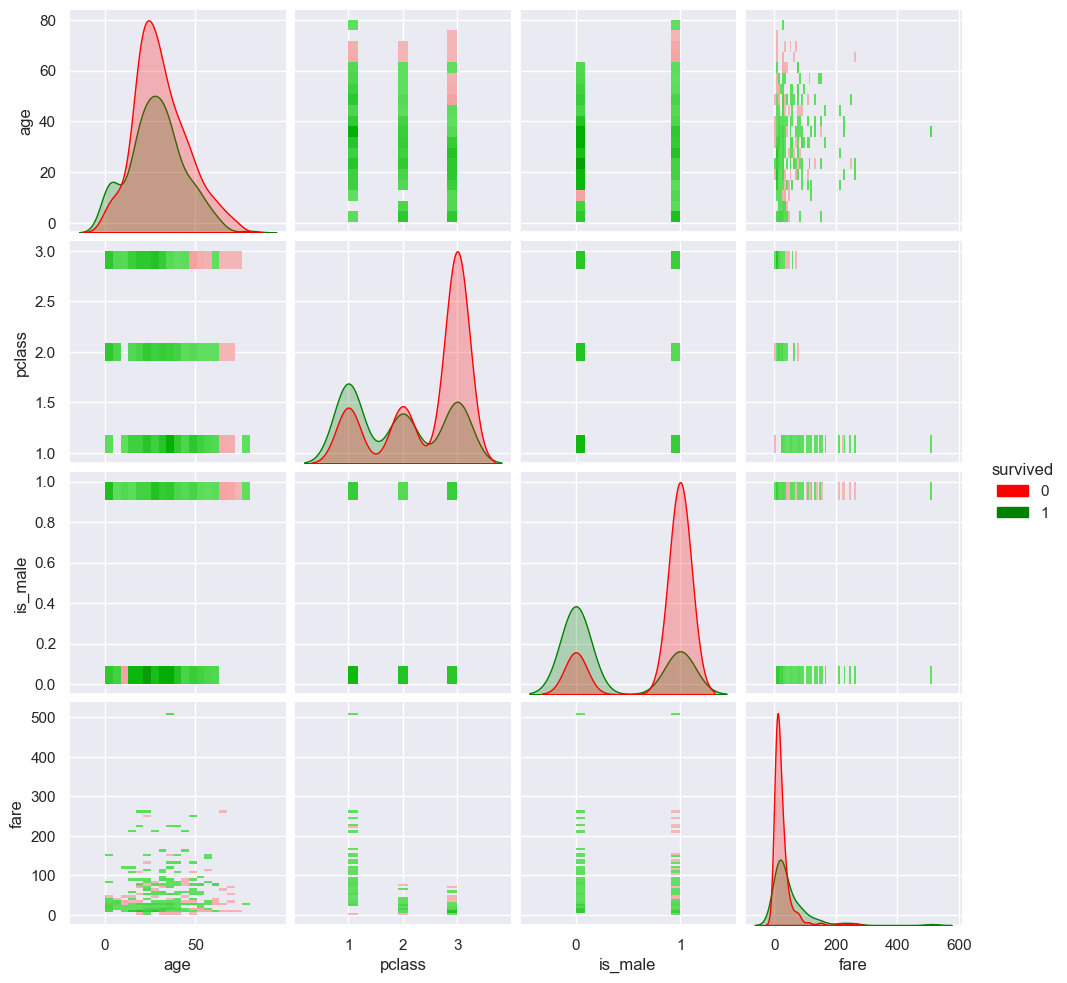

In [24]:
plt.figure(figsize=(12, 8))

pair_plot_temp = df[["survived", "age", "pclass", "is_male", "fare"]]
sns.pairplot(pair_plot_temp, kind='hist', diag_kind='kde', hue='survived', palette=["red", "green"])
plt.show()

### Survival Rates

Relationship of `Age` with `survival`

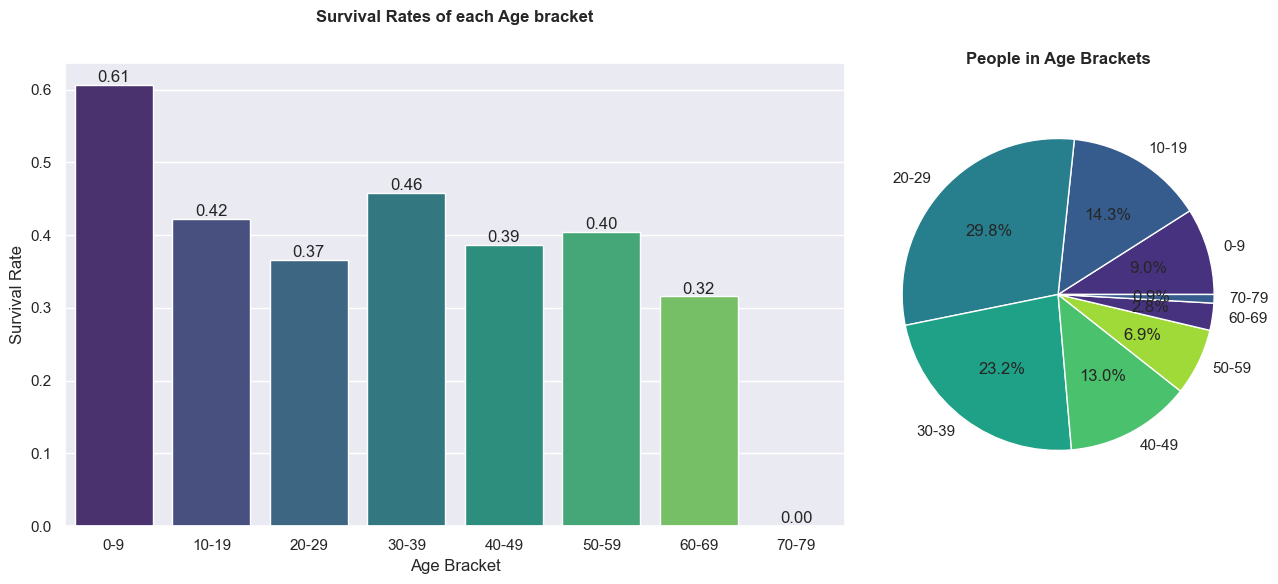

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6), gridspec_kw={'width_ratios': [2, 1]})

# Create age brackets (interval of 10 years)
df["AgeBracket"] = pd.cut(
    df["age"], 
    bins=range(0, 81, 10),
    labels=["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79"],
    right=False, 
    include_lowest=True
)
# Calculate survival rates & counts for each age bracket
age_bracket_survival_rate = df.groupby("AgeBracket", observed=False)["survived"].mean()
age_counts = df.groupby("AgeBracket", observed=False)["survived"].count()

# Bar plot on the left (spanning first two-thirds)
sns.barplot(x=age_bracket_survival_rate.index, y=age_bracket_survival_rate.values, hue=age_bracket_survival_rate.index, palette="viridis", ax=ax[0])
ax[0].set_title("Survival Rates of each Age bracket", weight="bold", y=1.07)
ax[0].set_xlabel("Age Bracket")
ax[0].set_ylabel("Survival Rate")

for bar in ax[0].patches:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )


# Pie chart on the right (remaining third)
ax[1].pie(x=age_counts.values, labels=age_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"))
ax[1].set_title('People in Age Brackets', weight="bold", y=1.07)

plt.tight_layout()
plt.show()

Relationship of `Class` with `survival`

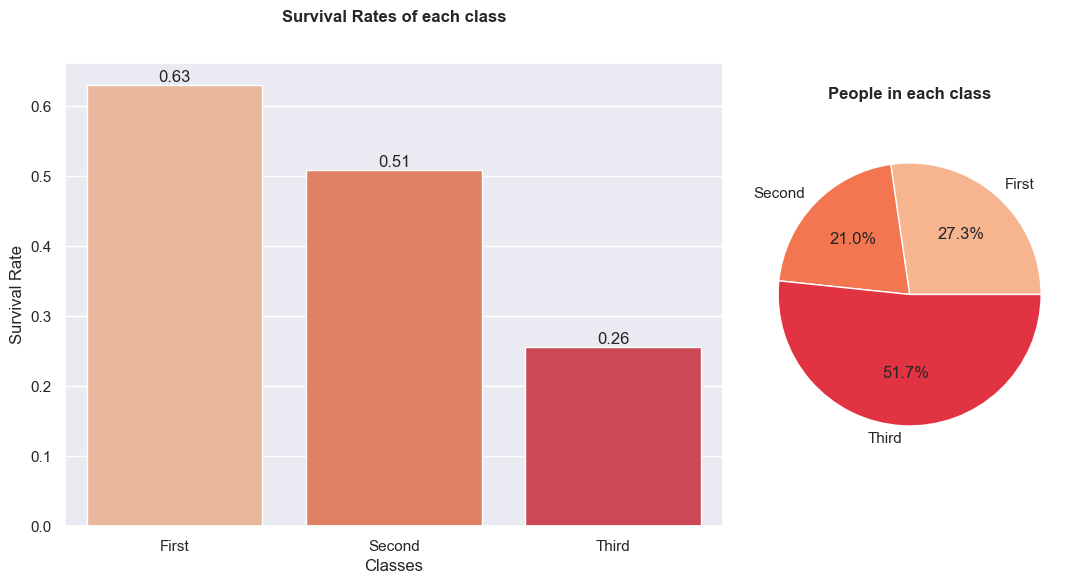

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(11, 6), gridspec_kw={'width_ratios': [2, 1]})

# Calculate survival rates & counts for each class
class_survival_rate = df.groupby("class", observed=False)["survived"].mean()
class_counts = df.groupby("class", observed=False)["survived"].count()
colors_palette = sns.color_palette("rocket_r")[:len(df["class"].unique())]

# Bar plot on the left
ax[0] = sns.barplot(x=class_survival_rate.index, y=class_survival_rate.values, hue=class_survival_rate.index, palette=colors_palette, ax=ax[0])
ax[0].set_title("Survival Rates of each class", weight="bold", y=1.07)
ax[0].set_xlabel("Classes")
ax[0].set_ylabel("Survival Rate")

for bar in ax[0].patches:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )


# Pie chart on the right
ax[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', colors=colors_palette)
ax[1].set_title('People in each class', weight="bold", y=1.07)

# Adjust layout
plt.tight_layout()
plt.show()

Relation of `gender` with `survival`

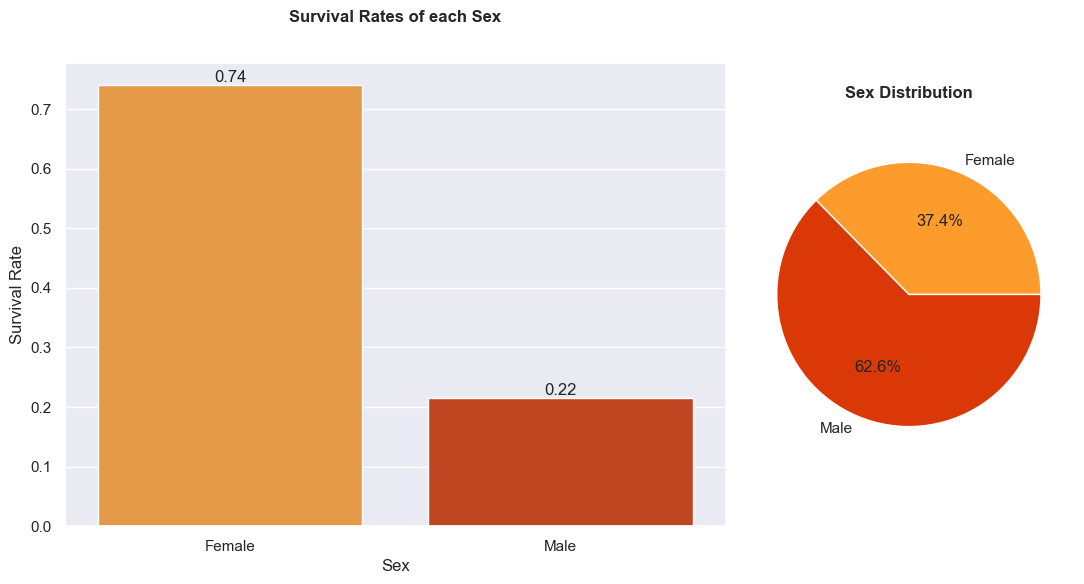

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(11, 6), gridspec_kw={"width_ratios": [2, 1]})

# Calculate survival rates & counts for each class
sex_survival_rate = df.groupby("is_male", observed=False)["survived"].mean()
sex_counts = df.groupby("is_male", observed=False)["survived"].count()
colors_palette = sns.color_palette("turbo_r")[:sex_survival_rate.count()][::-1]

# Bar plot on the left
ax[0] = sns.barplot(
    x=sex_survival_rate.index,
    y=sex_survival_rate.values,
    hue=sex_survival_rate.index,
    palette=colors_palette,
    ax=ax[0],
    legend=False,
)
ax[0].set_title("Survival Rates of each Sex", weight="bold", y=1.07)
ax[0].set_xlabel("Sex")
ax[0].set_xticks(ticks=sex_survival_rate.index, labels=["Female", "Male"])
ax[0].set_ylabel("Survival Rate")

for bar in ax[0].patches:
    height = bar.get_height()
    if height:
        ax[0].text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.2f}",
            ha="center",
            va="bottom",
        )


# Pie chart on the right
ax[1].pie(
    sex_counts.values,
    labels=["Female", "Male"],
    autopct="%1.1f%%",
    colors=colors_palette,
)
ax[1].set_title("Sex Distribution", weight="bold", y=1.07)

# Adjust layout
plt.tight_layout()
plt.show()

Relation of `Family_size` with `survival`

5


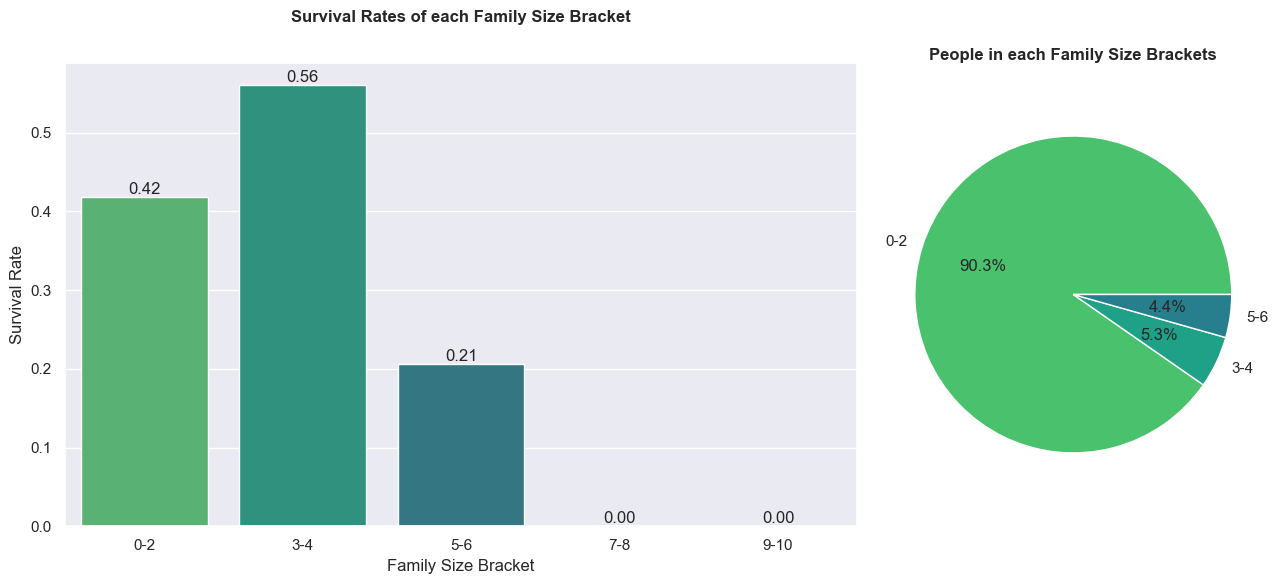

In [28]:
# Create Family size brackets (interval of 2)
df["FamilyBracket"] = pd.cut(
    df["Family_size"], 
    bins=range(0, 11, 2),
    labels=["0-2", "3-4", "5-6", "7-8", "9-10"],
    right=True, 
    include_lowest=True
)
# Calculate survival rates & counts for each family bracket bracket
family_bracket_survival_rate = df.groupby("FamilyBracket", observed=False)["survived"].mean()
family_bracket_counts = df.groupby("FamilyBracket", observed=False)["survived"].count()
colors_palette = sns.color_palette("viridis")[:family_bracket_survival_rate.count()][::-1]


fig, ax = plt.subplots(1, 2, figsize=(13, 6), gridspec_kw={'width_ratios': [2, 1]})

# Bar plot on the left (spanning first two-thirds)
sns.barplot(x=family_bracket_survival_rate.index, y=family_bracket_survival_rate.values, hue=family_bracket_survival_rate.index, palette=colors_palette, ax=ax[0])
ax[0].set_title("Survival Rates of each Family Size Bracket", weight="bold", y=1.07)
ax[0].set_xlabel("Family Size Bracket")
ax[0].set_ylabel("Survival Rate")

for bar in ax[0].patches:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )
print(len(ax[0].patches))

# Pie chart on the right (remaining third)
ax[1].pie(x=family_bracket_counts.values[:3], labels=family_bracket_counts.index[:3], autopct='%1.1f%%', colors=colors_palette[:3])
ax[1].set_title('People in each Family Size Brackets', weight="bold", y=1.07)

plt.tight_layout()
plt.show()

# Inferences

`Children` who boarded with adults or came alone

In [29]:
df.head()

,alive,survived,pclass,sex,is_male,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone,Family_size,AgeBracket,FamilyBracket
0,no,0,3,male,1,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,False,1,20-29,0-2
1,yes,1,1,female,0,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,False,1,30-39,0-2
2,yes,1,3,female,0,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,True,0,20-29,0-2
3,yes,1,1,female,0,35.0,1,0,53.1000,First,woman,False,C,Southampton,False,1,30-39,0-2
4,no,0,3,male,1,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,True,0,30-39,0-2


In [30]:
children = df[df['who'] == 'child']
children[['alone']].value_counts()

alone
False    76
True      6
Name: count, dtype: int64

`Children` who came alone and survived

In [31]:
children[(children['alone'] == True) & (children['alive'] == 'yes')]

,alive,survived,pclass,sex,is_male,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone,Family_size,AgeBracket,FamilyBracket
22,yes,1,3,female,0,15.0,0,0,8.0292,Third,child,False,NaN,Queenstown,True,0,10-19,0-2
777,yes,1,3,female,0,5.0,0,0,12.4750,Third,child,False,NaN,Southampton,True,0,0-9,0-2
780,yes,1,3,female,0,13.0,0,0,7.2292,Third,child,False,NaN,Cherbourg,True,0,10-19,0-2
875,yes,1,3,female,0,15.0,0,0,7.2250,Third,child,False,NaN,Cherbourg,True,0,10-19,0-2


# Descriptive Report

- **Age**:
    
    In a general sense, younger the person higher the survival rate

- **Gender**:
    
    Female gender has higher survival rate

- **Person Type**:
    
    In a general sense, women have higher survival rate, follwed by childern

- **Ticket Classes**:
    
    First class passengers seems to have higher survival rate

- **Family size**:

    People with 2-4 family size *(Lower size)* tend to have higher survival rate

# Survival Prediction

## Data Pre-Processsing for Modelling

### Missing Values:

In [32]:
df_no_dp

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [33]:
df_no_dp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    object  
 3   age          678 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     782 non-null    object  
 8   class        784 non-null    category
 9   who          784 non-null    object  
 10  adult_male   784 non-null    bool    
 11  deck         202 non-null    category
 12  embark_town  782 non-null    object  
 13  alive        784 non-null    object  
 14  alone        784 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 77.0+ KB


In [34]:
df_no_dp.isna().sum().sort_values(ascending=False).to_frame(name="NAN Counts")

,NAN Counts
deck,582
age,106
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


Dropping NANs

In [35]:
df_no_miss = df_no_dp.drop(columns=['deck'])
df_no_miss = df_no_miss.dropna()

In [36]:
df_no_miss.isna().sum().sort_values(ascending=False).to_frame(name="NAN Counts")

,NAN Counts
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


### Feature Encoding

In [37]:
df = df_no_miss

One-hot encoding  `sex`

In [38]:
sex_encoder = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
sex_encoded = sex_encoder.fit_transform(df[["sex"]])

df = pd.concat([df.drop(columns=["sex"]), sex_encoded], axis=1)
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.0
1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0.0
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0.0
3,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0.0
4,0,3,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1.0


One-hot encoding  `embarked`

In [39]:
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.0
1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0.0
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0.0
3,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0.0
4,0,3,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1.0


In [40]:
embarked_encoder = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
embarked_encoded = embarked_encoder.fit_transform(df[["embarked"]])

df = pd.concat([df.drop(columns=["embarked"]), embarked_encoded], axis=1)
df.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,1.0,0.0,1.0


One-hot encoding `pclass`

In [41]:
pclass_encoder = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
pclass_encoded = pclass_encoder.fit_transform(df[["pclass"]])

df = pd.concat([df.drop(columns=["pclass"]), pclass_encoded], axis=1)
df.head()

,survived,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1.0,0.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0.0,0.0,1.0,0.0,1.0
3,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,0.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,1.0,0.0,1.0,0.0,1.0


### Feature Selection

In [42]:
df.head()

,survived,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1.0,0.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0.0,0.0,1.0,0.0,1.0
3,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,0.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,1.0,0.0,1.0,0.0,1.0


In [43]:
df.drop(
    columns=["embark_town", "alive", "class", "who", "adult_male", "alone"],
    inplace=True,
)
df.head()

,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,1.0,0.0,1.0,0.0,1.0


### Outlier Handling

#### `age`

<Axes: xlabel='age', ylabel='Count'>

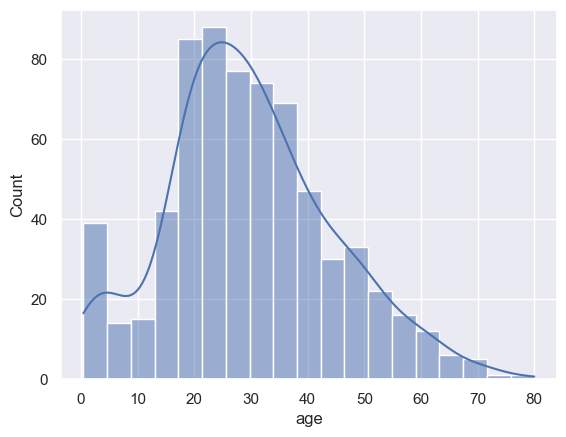

In [44]:
sns.histplot(x=df["age"], kde=True)

In [45]:
df[["age"]].describe()

,age
count,676.000000
mean,29.809793
std,14.725652
min,0.420000
25%,20.000000
50%,28.000000
75%,39.000000
max,80.000000


In [46]:
min_cutoff = df["age"].mean() - 3 * df["age"].std()
max_cutoff = df["age"].mean() + 3 * df["age"].std()
min_cutoff, max_cutoff

(np.float64(-14.36716265753429), np.float64(73.98674845635085))

In [47]:
df = df[df["age"] <= max_cutoff]
df[["age"]].describe()

,age
count,674.000000
mean,29.669763
std,14.519813
min,0.420000
25%,20.000000
50%,28.000000
75%,39.000000
max,71.000000


<Axes: xlabel='age', ylabel='Count'>

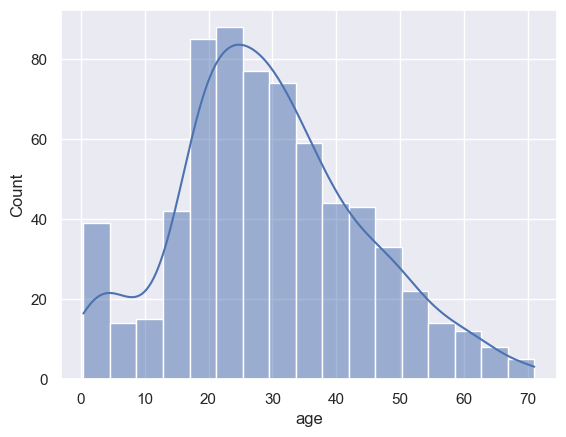

In [48]:
sns.histplot(x=df["age"], kde=True)

#### `survived`

In [49]:
df[["survived"]].describe()

,survived
count,674.000000
mean,0.416914
std,0.493415
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<Axes: ylabel='Frequency'>

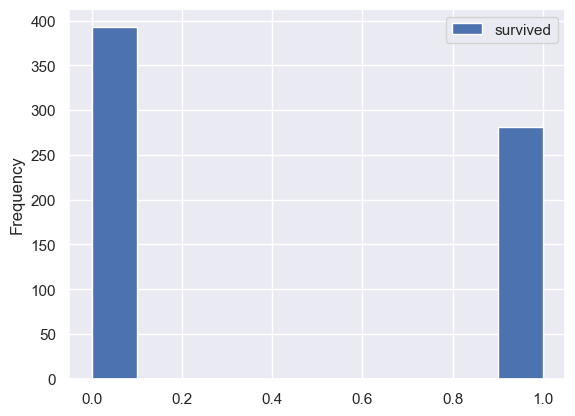

In [50]:
df[["survived"]].plot(kind="hist")

## Modelling

In [51]:
df.head()

,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,1.0,0.0,1.0,0.0,1.0


Features & Target

In [52]:
features = df.drop(columns=["survived"])
target = df["survived"]

Train Test Split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("train:", len(X_train), "| test:", len(X_test))

train: 539 | test: 135


#### Train

In [54]:
model = LogisticRegression(max_iter=500)
model = model.fit(X_train, y_train)

In [55]:
# Coefficients for each feature
coefficients = model.coef_
intercept = model.intercept_
pd.DataFrame(
    {
        "features": np.concatenate((["Bias"], features.columns)),
        "coefficients": np.concatenate((intercept, coefficients.squeeze())),
    }
)

,features,coefficients
0,Bias,3.937853
1,age,-0.045695
2,sibsp,-0.337867
3,parch,-0.022726
4,fare,0.002324
5,sex_male,-2.382249
6,embarked_Q,-0.604416
7,embarked_S,-0.424142
8,pclass_2,-0.642896
9,pclass_3,-1.974913


#### Test

In [56]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Confusion Matrix

Confision matrix on training data

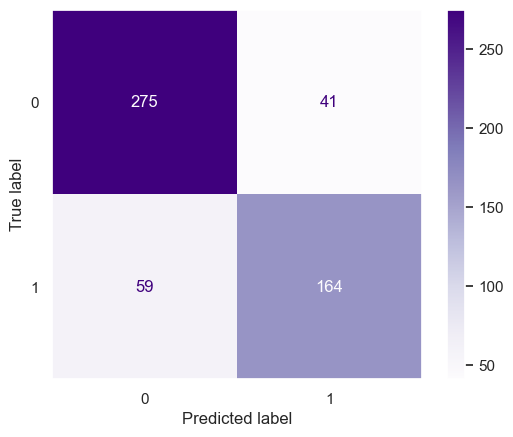

In [57]:
cm_train = metrics.confusion_matrix(y_true=y_train, y_pred=y_pred_train, labels=model.classes_)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_).plot(cmap='Purples')
plt.grid(False)
plt.show()

Confision matrix on test data

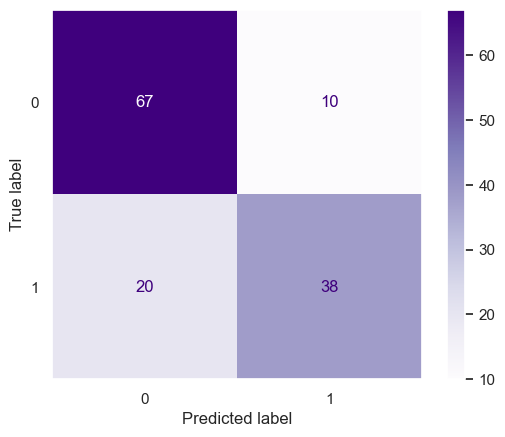

In [58]:
cm_test = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_test, labels=model.classes_)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_).plot(cmap='Purples')
plt.grid(False)
plt.show()

#### Performance Metrics

Metrics on Train data

In [59]:
metrics.accuracy_score(y_train, y_pred_train)

0.8144712430426716

In [60]:
metrics.precision_score(y_train, y_pred_train)

np.float64(0.8)

Metrics on Test data

In [61]:
metrics.accuracy_score(y_test, y_pred_test)

0.7777777777777778

In [62]:
metrics.precision_score(y_test, y_pred_test)

np.float64(0.7916666666666666)

In [63]:
metrics.recall_score(y_test, y_pred_test)

np.float64(0.6551724137931034)

In [64]:
metrics.f1_score(y_test, y_pred_test)

np.float64(0.7169811320754716)

In [65]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.79      0.66      0.72        58

    accuracy                           0.78       135
   macro avg       0.78      0.76      0.77       135
weighted avg       0.78      0.78      0.77       135



#### ROC & AUC

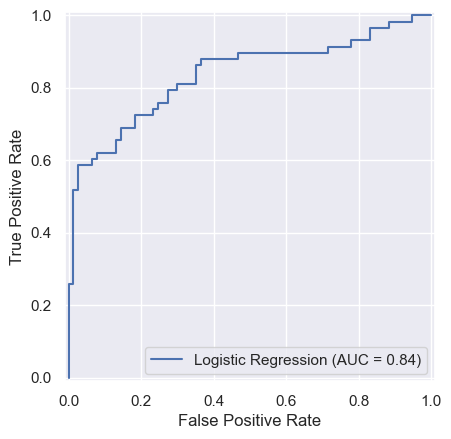

In [66]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Logistic Regression"
)

display.plot()
plt.show()